<a href="https://colab.research.google.com/github/Negi270804/Face-Mask-Detection-using-CNN-model/blob/main/Face_Mask_Detection_using_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AUTHOR - NIKHIL NEGI
## LINKEDIN - https://www.linkedin.com/in/nikhil-negi-0bb166328
## GITHUB - https://github.com/Negi270804/Face-Mask-Detection-using-CNN-model.git

# Importing the Face Mask Dataset

In [6]:
pip install kaggle

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('done')

done


In [10]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


# Import the Dependencies

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [12]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3197.jpg', 'with_mask_49.jpg', 'with_mask_3333.jpg', 'with_mask_587.jpg', 'with_mask_101.jpg']
['with_mask_1961.jpg', 'with_mask_2449.jpg', 'with_mask_3302.jpg', 'with_mask_1571.jpg', 'with_mask_1162.jpg']


In [13]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1146.jpg', 'without_mask_216.jpg', 'without_mask_2264.jpg', 'without_mask_1369.jpg', 'without_mask_2551.jpg']
['without_mask_2244.jpg', 'without_mask_1499.jpg', 'without_mask_2156.jpg', 'without_mask_1342.jpg', 'without_mask_1497.jpg']


In [14]:
print('with mask images:',len(with_mask_files))
print('without mask images:',len(without_mask_files))

with mask images: 3725
without mask images: 3828


# **Creating Labels for the two class of images**


*   with mask << 1
*   without mask << 0

In [15]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [16]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [17]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [18]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


# **Displaying the Images**

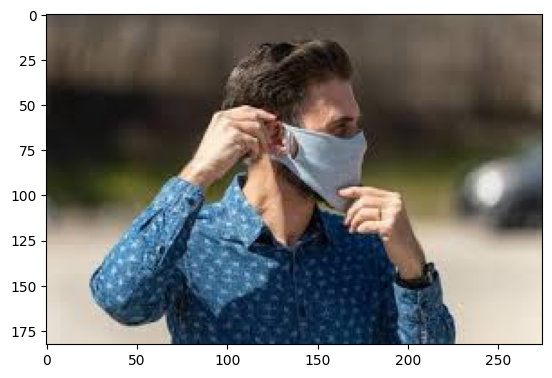

In [20]:
img = mpimg.imread('/content/data/with_mask/with_mask_2590.jpg')
imgplot = plt.imshow(img)
plt.show()

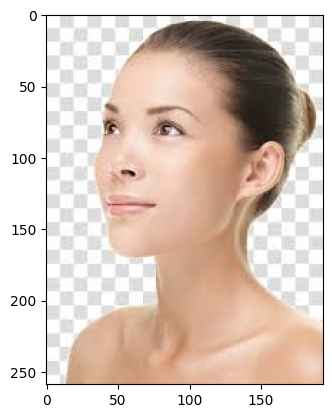

In [21]:
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

# Image Processing


1.   Resize the images
2.   Convert the images into numpy arrays



In [22]:
with_mask_path = '/content/data/with_mask/'
data = []
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'
for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [23]:
type(data)

list

In [24]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
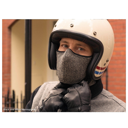

In [25]:
data[0]

In [26]:
type(data[0])

numpy.ndarray

In [27]:
data[0].shape

(128, 128, 3)

In [28]:
X = np.array(data)
Y = np.array(labels)

In [30]:
type(X)

numpy.ndarray

In [31]:
type(Y)

numpy.ndarray

In [32]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [33]:
print(Y)

[1 1 1 ... 0 0 0]


# Train Test Split

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [35]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [36]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [37]:
X_train_scaled[0]

array([[[0.98431373, 1.        , 1.        ],
        [0.98823529, 1.        , 1.        ],
        [0.98823529, 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.98823529, 1.        , 1.        ],
        [0.98823529, 1.        , 1.        ],
        [0.99215686, 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.99215686, 1.        , 1.        ],
        [0.99215686, 1.        , 1.        ],
        [0.99607843, 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.14901961, 0.10588235, 0.09019608],
        [0.1372549 , 0.09411765, 0.07843137],
        [0.10980392, 0

# Building a Convolutional Neural Networks(CNN)

In [38]:
import tensorflow as tf
from tensorflow import keras

In [39]:
num_of_classes=2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [41]:
history = model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - acc: 0.6920 - loss: 0.6113 - val_acc: 0.8893 - val_loss: 0.2585
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8899 - loss: 0.2790 - val_acc: 0.9124 - val_loss: 0.2164
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9040 - loss: 0.2423 - val_acc: 0.9289 - val_loss: 0.1873
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9266 - loss: 0.1904 - val_acc: 0.9256 - val_loss: 0.1782
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9318 - loss: 0.1657 - val_acc: 0.9388 - val_loss: 0.1615


# Model Evaluation

In [42]:
loss,accuracy=model.evaluate(X_test_scaled,Y_test)
print('Test Accuracy =',accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.9112 - loss: 0.2191
Test Accuracy = 0.9185969829559326


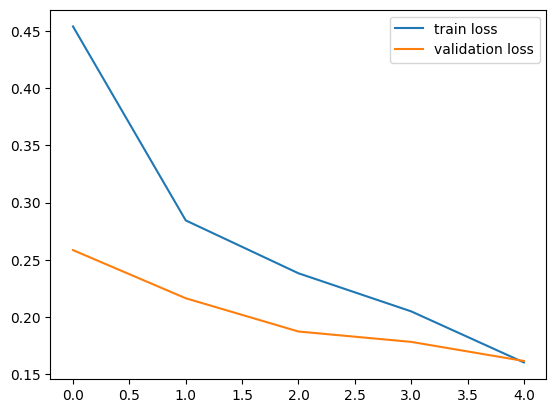

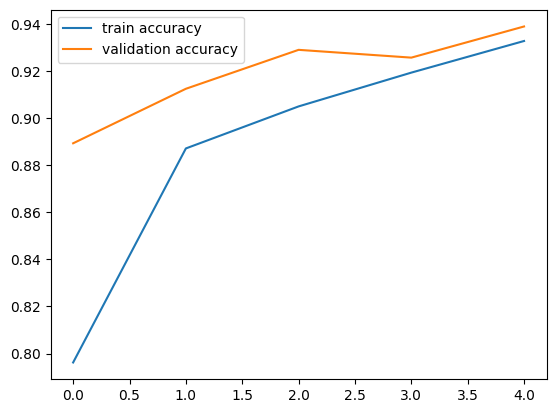

In [43]:
h = history
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

# Predictive System

Path of the image to be predicted: /content/imageclassifier.jpeg


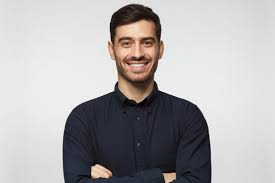

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.5651502  0.47080606]]
0
The person in the image is not wearing a mask


In [51]:
imput_image_path = input("Path of the image to be predicted: ")
input_image = cv2.imread(imput_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image,(128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 1:
  print("The person in the image is wearing a mask")
else:
  print("The person in the image is not wearing a mask")